# Python Project - Marvel Mart Project


## Ty Hak


### March 7th 2022

In [328]:
import csv 
from itertools import zip_longest
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Part 1: Cleaning the data

In [329]:
# Before doing anything, we need to read the csv file first so that we can clean the data.

salePrice = pd.read_csv('Data/MM_Sales.csv')

In [330]:
salePrice

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


In [331]:
# To find how many columns and rows I need to use the function 'shape'

salePrice.shape

(50000, 14)

In [332]:
# This is where we find out what type of data in each columns
# You can see that some are objects, interger and float numbers contain in the data. 

print(salePrice.dtypes)

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [333]:
# This is where I find the data that is missing.
# You can see that 'Order priority' is missing and also 'Item Type'. 

salePrice.isna().sum()


Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

In [334]:
# We have to create copy of our dataframe. 
# Which mean creating a copy of a clean dataframe.

CleanSP = salePrice.copy()

In [335]:
# 1. Testing if I have replaced the missing data with 0 on 'Order prioirity'.
# So I have replaced the missing with null.

CleanSP['Order Priority'].fillna('NULL', inplace=True) 
CleanSP.isna().sum()

Region            0
Country           0
Item Type         6
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [336]:
# Order Priority (either missing AND/OR won't be a valid priority code of 'C', 'H', 'M', 'L', or 'NULL')
# So I loop throught Order priority rows and if its missing. 

count = 0
for index, row in CleanSP.iterrows():
    if row.loc['Order Priority'] not in ['C', 'H', 'M', 'L', 'NULL']:
        CleanSP.loc['Order Priority'] = 'NULL'
        print(row.loc['Order Priority'])
        count += 1
print(count)

0


In [337]:
# To turn in a clean version, I need to remove data that are in 'Order Priority' that are NULL. 

CleanSP = CleanSP[CleanSP['Order Priority'] != "NULL"]
print(CleanSP.count())

Region            49985
Country           49985
Item Type         49979
Sales Channel     49985
Order Priority    49985
Order Date        49985
Order ID          49985
Ship Date         49985
Units Sold        49985
Unit Price        49985
Unit Cost         49985
Total Revenue     49985
Total Cost        49985
Total Profit      49985
dtype: int64


In [338]:
# 2. Now we have to replace NULL on 'Item Type' because it is missing. 
# It is now a clean version because I have replace with null. 
# The data are now in a clean version since the result is all 0.

CleanSP['Item Type'].fillna('NULL', inplace=True)
CleanSP.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [339]:
# Creating a list with a unique items types which I used 'for loop' so that I can check every column. 
# As of result, there are no invalid in the items types column. 

un = CleanSP['Item Type'].unique()
print(un)

x = 0
for index, row in CleanSP.iterrows():
    if row.loc['Item Type'] not in (un):
        CleanSP.loc['Item Type'] = 'NULL'
        print(row.loc['Item Type'])
        x += 1
print(x)

['Household' 'Baby Food' 'Meat' 'Cereal' 'Cosmetics' 'Fruits' 'NULL'
 'Vegetables' 'Office Supplies' 'Personal Care' 'Beverages' 'Snacks'
 'Clothes']
0


In [340]:
# So now I remove 'NULL' in 'Item Type' which will be the the clean version.

CleanSP = CleanSP[CleanSP['Item Type'] != "NULL"]
print(CleanSP.count())

Region            49979
Country           49979
Item Type         49979
Sales Channel     49979
Order Priority    49979
Order Date        49979
Order ID          49979
Ship Date         49979
Units Sold        49979
Unit Price        49979
Unit Cost         49979
Total Revenue     49979
Total Cost        49979
Total Profit      49979
dtype: int64


In [341]:
# 3 
#'Country' (either missing OR will be a number as a string)
# There are 3 erroneous in country values. 

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        count += 1
        CleanSP.loc[int(index), 'Country'] = 'NULL'
    except:
        1==1
print(count)

3


In [342]:
# So I removed the 'Country' that contain 'NULL'.

CleanSP = CleanSP[CleanSP['Country'] != "NULL"]
print(cleanSP.count())

Region            49976
Country           49976
Item Type         49976
Sales Channel     49976
Order Priority    49976
Order Date        49976
Order ID          49976
Ship Date         49976
Units Sold        49976
Unit Price        49976
Unit Cost         49976
Total Revenue     49976
Total Cost        49976
Total Profit      49976
dtype: int64


In [343]:
#4 
# Order ID (either missing OR won't be a number)
# There are 5 erroneous in country values.

count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Order ID'] = int(row.loc['Order ID'])
    except:
        CleanSP.loc[int(index), 'Order ID'] = 0
        count += 1
print(count)

5


In [344]:
# This is where I remove the 'Order ID' that contain 0. 

CleanSP = CleanSP[CleanSP['Order ID'] != 0]
print(CleanSP.count())

Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


In [345]:
# 5
# Testing if 'Region' have correct data.
# To check if 'Region' if its intergers or floats therefore it is a correct data.

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Region'] = float(row.loc['Region'])
        CleanSP.loc[int(index), 'Region'] = 'NULL'
        count += 1
    except:
        1==1
print(count)

0


In [346]:
# 6
# Testing if 'Sales Channel' have correct data.
# Since the result is 0, therefore is has correct data. 

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Sales Channel'] = int(row.loc['Sales Channel'])
        CleanSP.loc[int(index), 'Sales Channel'] = 'NULL'
        count += 1
    except:
        1==1
print(count)

x = CleanSP['Sales Channel'].unique()
print(x)

y = 0
for index, row in CleanSP.iterrows():
    if row.loc['Sales Channel'] not in (x):
        CleanSP.loc['Sales Channel'] = 'NULL'
        print(row.loc['Sales Channel'])
        y += 1
print(y)

0
['Offline' 'Online']
0


In [347]:
#7
# Testing if 'Order Date' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Order Date'] = float(row.loc['Order Date'])
        CleanSP.loc[int(index), 'Order Date'] = 'NULL'
        count += 1
    except:
        1==1
print(count)

0


In [348]:
# 8
# Testing if 'Ship Date' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Ship Date'] = float(row.loc['Ship Date'])
        CleanSP.loc[int(index), 'Ship Date'] = 'NULL'
        count += 1
    except:
        1==1
print(count)

0


In [349]:
# 9
# Testing if 'Unit Sold' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Units Sold'] = int(row.loc['Units Sold'])
    except:
        CleanSP.loc[int(index), 'Units Sold'] = 0
        count += 1
print(count)

0


In [350]:
# 10
# Testing if 'Unit Price' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Unit Price'] = float(row.loc['Unit Price'])
    except:
        CleanSP.loc[int(index), 'Units Price'] = 0.0
        count += 1
print(count)

0


In [351]:
# 11
# Testing if 'Unit Cost' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        row.loc['Unit Cost'] = float(row.loc['Unit Cost'])
    except:
        CleanSP.loc[int(index), 'Unit Cost'] = 0
        count += 1
print(count)

0


In [352]:
# 12
# Testing if 'Total Revenue' have correct data.
# Since the result is 0, therefore is has correct data
'''
I tested the 'Total Revenue' if there is inaccurate data and change to 0.0.
However, I found no inaccurrate data in that column. *
'''
count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Total Revenue'] = float(row.loc['Total Revenue'])
    except:
        CleanSP.loc[int(index), 'Total Revenue'] = 0.0
        count += 1
print(count)

0


In [353]:
# 13
# Testing if 'Total Cost' have correct data.
# Since the result is 0, therefore is has correct data
count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Total Cost'] = float(row.loc['Total Cost'])
    except:
        CleanSP.loc[int(index), 'Total Cost'] = 0.0
        count += 1
print(count)

0


In [354]:
#14
# Testing if 'Total Profit' have correct data.
# Since the result is 0, therefore is has correct data

count = 0
for index, row in CleanSP.iterrows():
    try:
        # Test if the value is the number
        row.loc['Total Profit'] = float(row.loc['Total Profit'])
    except:
        CleanSP.loc[int(index), 'Total Profit'] = 0.0
        count += 1
print(count)

0


In [355]:
# Write a clean version of the csv file version that is call 'MM_Sales_clean.csv'

CleanSP.to_csv('Data/MM_Sales_clean.csv', index=False)


### Part 2: Exploratory Data Analysis with Reports & Visualizations
 

In [356]:
# First you have to read the data file before doing anyhting else. 

salesC = pd.read_csv('Data/MM_Sales_clean.csv')

## 1).Countries Ranking

#### A). Use Seaborn or Matplotlib to create a chart of your choice showing these top 10 values by country.

In [357]:
# This is the csv file that I be using from now on.

salesC = pd.read_csv('Data/MM_Sales_clean.csv', sep=',')


In [358]:
# Firstly, I am counting the number of rows in 'Country'.
# Secondly, sorting it out by order from higher values to lower.
# Lastly, I grab the top 10 countries.

Countries = salesC.groupby('Country')['Order Priority'].count()
Countries = Countries.sort_values(ascending=False)
topCountries = {}
count = 0
for index, value in Countries[0:10].iteritems():
    topCountries[index] = value

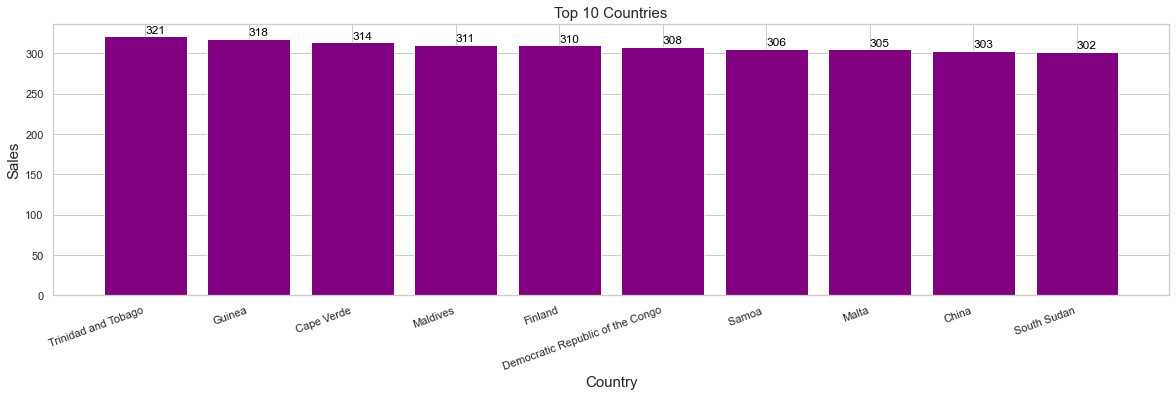

In [359]:
# Creating the barplot graph that tell us about the top 10 countries with how much sales they have. 

plt.figure(figsize=(20,5))
plt.bar(topCountries.keys(), topCountries.values(), color='purple')
plt.title('Top 10 Countries', fontsize=15)
plt.xlabel('Country', fontsize=15)
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=20, ha='right') 
plt.ylabel('Sales', fontsize=15)
for i, v in enumerate(topCountries.values()):
    ax.text(i, v + 4, str(v), color='black')
plt.show()

#### B). Write the results to a text file called MM_Rankings.txt.


In [360]:
# Writing the result to a new text file that is call 'MM_Rankings.txt'

with open ('Data/MM_Rankings.txt', 'w+') as writer:
    writer.write('Countries Most Sale Transactions:\n')
couRan = ['Trinidad and Tobago: 321\n',
            'Guinea: 318\n',
            'Cape Verde: 314\n',
            'Maldives: 311\n',
            'Finland: 310\n',
            'Democratic Republic of the Congo: 308\n',
            'Samoa: 306\n',
            'Malta: 305\n',
            'China: 303\n',
            'South Sudan: 302\n\n'
]
with open ('Data/MM_Rankings.txt', 'a+') as writer:
    writer.writelines(couRan)
    
comment = ('Cape Verder would be best country to built our shipping center which is the third countries with the most sales.\n\n')
with open ('Data/MM_Rankings.txt', 'a+') as writer:
    writer.writelines(comment)


### 2. Counting the Order Priorities and Sales Channel

#### A).Determine the count for how many online and offline orders we take.

In [361]:
# This is where I find how many online and offline on the Sales Channel there are. 

sChan = cleanSP['Sales Channel'].value_counts()
print('Sales and Counts')
print(sChan)

Sales and Counts
Online     30185
Offline    19791
Name: Sales Channel, dtype: int64


#### B). Determine the count of the different Order Priority types.

In [362]:
# There are only four catagories in C, H, L and M. 

orderPr = cleanSP.groupby(['Order Priority'])['Order Priority'].count()
print(orderPr)

Order Priority
C     5012
H    15097
L     9985
M    19882
Name: Order Priority, dtype: int64


#### C).Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).

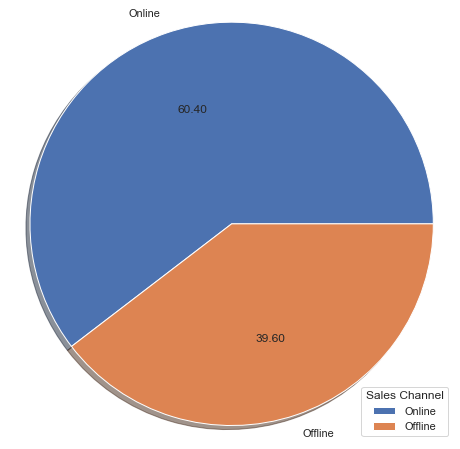

In [363]:
# I created pie chart for Sales Channel. 

plt.figure(figsize=(8,8))
plt.pie(sChan, labels=sChan.index, shadow=True, autopct='%.2f') 
plt.axis('equal')
plt.legend(loc=4, title='Sales Channel') 
plt.show()

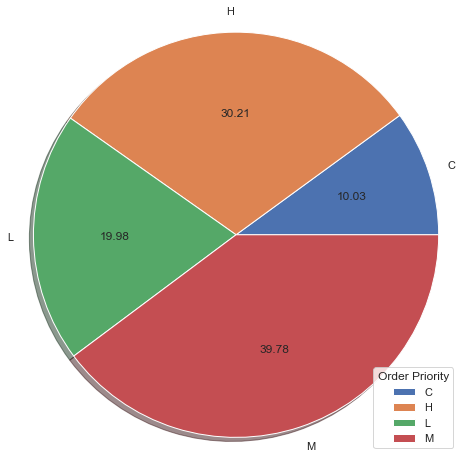

In [364]:
# So I created pie chart for the Order Priority.

plt.figure(figsize=(8, 8))
plt.pie(orderPr, labels=orderPr.index, shadow=True, autopct='%.2f')
plt.axis('equal')  
plt.legend(loc=4, title='Order Priority')
plt.show()

#### D). Add the results of the highest sales channel type and the highest order priority to the file MM_Rankings.txt.

In [365]:
# Creating a new text file and writing the result into the text file call "MM_Rankings.txt"

with open('Data/MM_Rankings.txt', 'a+') as writer:
    writer.write('Highest sales channel type and the highest order priority:\n')
    
saleChannel= ('Sales Channels:\nOnline: 30183\nOffline: 19788\nWe do more online sales.\n')
with open ('data/MM_Rankings.txt', 'a+') as writer:
    writer.writelines(saleChannel)
orderPriority = ('Order Priorities:\nL: 9984\nM: 19881\nH: 15094\nC: 5012\nWe do more M: Medium order priorities.\n')
with open ('data/MM_Rankings.txt', 'a+') as writer:
    writer.writelines(orderPriority)

### 3).For our next section, we will need you to give us an idea of how well our Item Types are producing profits for us. At the end, report to us which 3 item types are providing the most profit.

#### A). Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

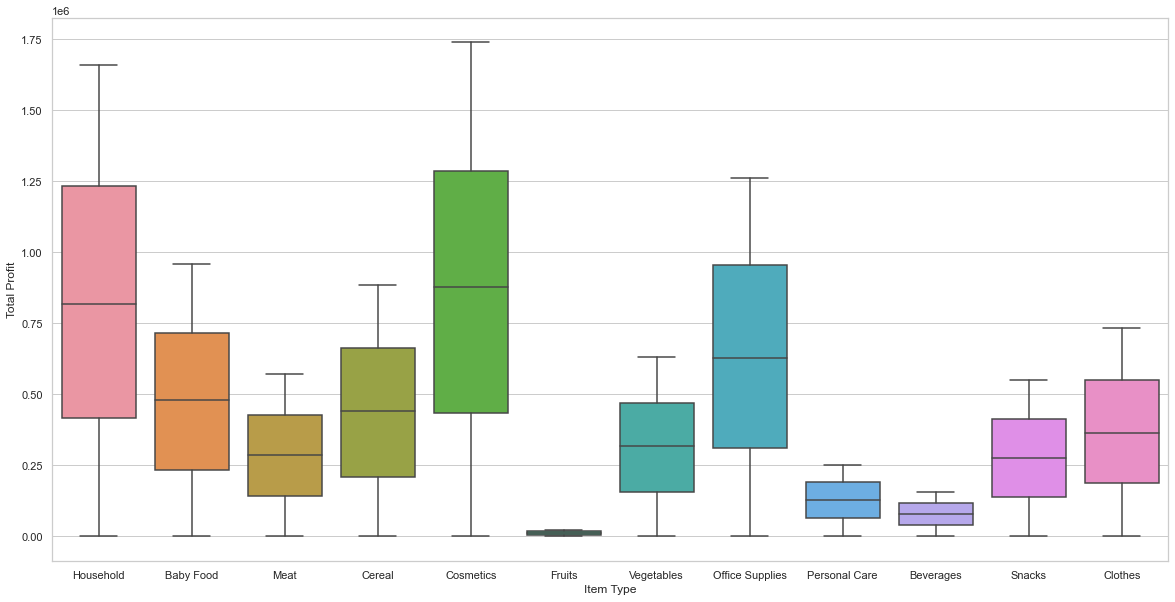

In [366]:
# Creating a boxplot using Seaborn showing the Total Profits by the Item Type. 
# The boxplot show the first quartile, third quartile, meadian, max and minimum. 

plt.figure(figsize=(20, 10))
bxPlot = sns.boxplot(CleanSP['Item Type'], CleanSP['Total Profit'])

#### B). Use Python to determine the sum of Total Profit by Item Type.

In [367]:
totalSum = CleanSP.groupby(['Item Type'])['Total Profit'].sum()
print(totalSum)

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


#### C). Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.

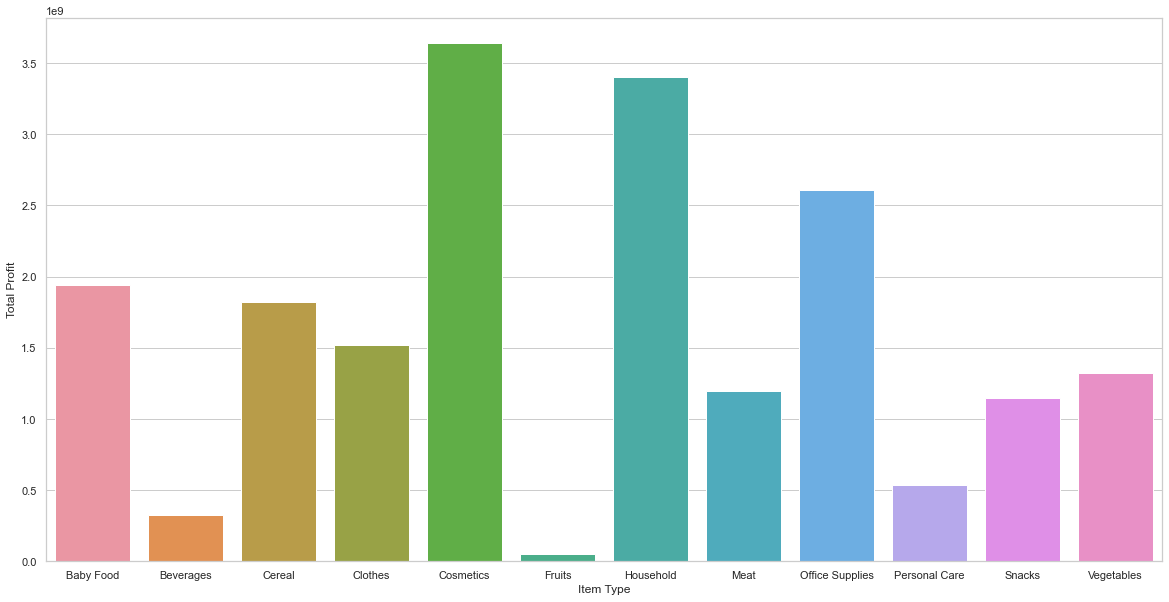

In [368]:
# Created a bar plot which show the total sum of different Item types using the "barplot" code.

plt.figure(figsize=(20, 10))
sns.set(style='whitegrid')
bP = sns.barplot(totalSum.index, totalSum)

#### D). Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this).  Please list the item types and the amount of profit made from sales.

In [369]:
# I find the top 3 rank of the total profits so meaning it has the highest one. 

rankTop3 = CleanSP['Total Profit'].groupby(CleanSP['Item Type']).sum().nlargest(3)
print(rankTop3)

Item Type
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: Total Profit, dtype: float64


#### E). Add the results of the top 3 item types to the file MM_Rankings.txt.

In [370]:
# Writing the result of the top 3 rank in the "MM_Rankings.txt"

highestSell = ('Highest Selling Items:\nCosmetics: 3638407966.750\nHousehold: 3401180998.06\nOffice Supplies: 2605440187.50\nWe profited from Cosmetics the most.\n\n')
with open ('Data/MM_Rankings.txt', 'a+') as writer:
    writer.writelines(highestSell)


#### F). Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

The boxplot does have alot of detail in terms of business analytics. As a businesss analytics, when looking the maximum total profits you can make decision by whether you should still sell that item type or not. For example fruits and beverages which has the less maximum total profits. Also more marketing need to be done with Item types on fruits and beverages. 

As you can the household and comestics item types which has the most maximum total profits which tells me that there no need for improve however we need to keep it stable and avoid cahnges because it might effect the profits.



#### 4). Please determine the sum, average and maximum values for the Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit. Please put this in a report.

#### A). Produce the data above for the sum of the requested columns.

In [371]:
# Calculating the total sum values for Units sold, Unit Cost, Total Revenue, Total, Cost and Total Profit. 
# Using 'sum' code to calculate total. 

sumColumn = ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
sum_totalPrice = CleanSP[sumColumn].sum()
print(sum_totalPrice)

Units Sold        249818150.000
Unit Cost           9360768.320
Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
dtype: float64


#### B). Produce the data above for the average of the requested columns. (Average Units Sold, Average Cost, etc)

In [372]:
# Calculating the average which I have to use the code 'mean'. 

averPrice = CleanSP[sumColumn].mean()
print(averPrice)

Units Sold         4999.263
Unit Cost           187.324
Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
dtype: float64


#### C). Produce the data above for the maximum of the requested columns. (Max Units Sold, Max Cost, etc.)

In [373]:
# Calculating the maximum values so I use the code 'max' to find it. 

maxPrice = CleanSP[sumColumn].max()
print(maxPrice)

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64


#### D). Create two line plots using Seaborn or Matplotlib, one for the sums and one for both the averages and the maximums. DO NOT INCLUDE UNITS SOLD OR UNITS COST.

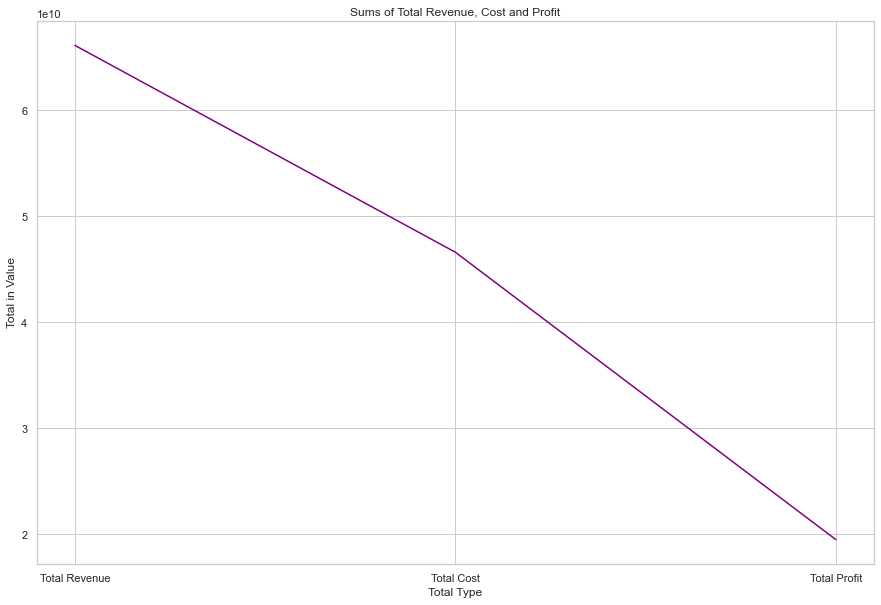

In [374]:
# Finding the sum, average and maximum in the column list that I make which is Total Revunue, Total Cost, and Total Profit. 

column = ['Total Revenue', 'Total Cost', 'Total Profit']

maxPrice1 = CleanSP[column].max()
averPrice1 = CleanSP[column].mean()
totalPrice1 = CleanSP[column].sum()

plt.figure(figsize=(15, 10))
plt.plot(totalPrice1.index, totalPrice1, color='purple')
plt.title('Sums of Total Revenue, Cost and Profit')
plt.xlabel('Total Type')
plt.ylabel('Total in Value')
plt.show()

print('\n')

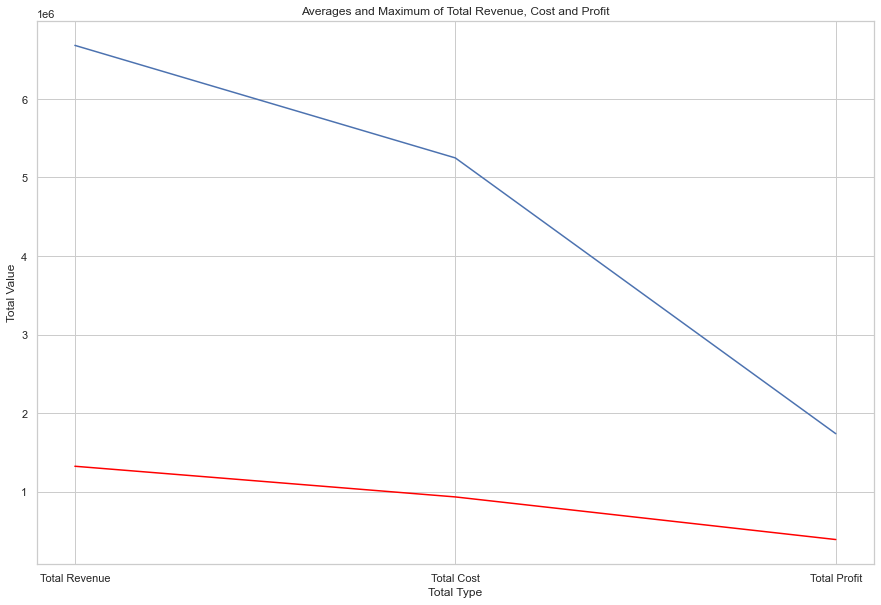

In [375]:
# The red line on the graph is defined as the average and the blue is defined as the maximum. 

plt.figure(figsize=(15, 10))
plt.plot(averPrice1.index, averPrice1, color='red')
plt.plot(maxPrice1.index, maxPrice1)
plt.title('Averages and Maximum of Total Revenue, Cost and Profit')
plt.xlabel('Total Type')
plt.ylabel('Total Value')
plt.show()

#### E).Now you will save these calculations below to a text file called MM_Calc.txt. 

In [376]:
# Saving the calculations I did to a text file call 'MM_Calc.txt'
# So I have to open the file and write it into the file. 
# Using 'w+' to create and write into a new file. 
# Using 'a+' to write or to append into that file. 

totalSum = ('Sums:\nUnits Sold: 249818150.000\n'
            'Unit Cost: 9360768.320\n'
            'Total Revenue: 66145004417.170\n'
            'Total Cost: 46629032915.810\n'
            'Total Profit: 19515971501.360\n\n')

with open ('Data/MM_Calc.txt', 'w+') as writer:
    writer.write(totalSum)

totalAverage = ('Averages:\nUnits Sold: 4999.263\n'
                'Unit Cost: 187.324\n'
               'Total Revenue: 1323667.826\n'
               'Total Cost: 933121.879\n'
               'Total Profit: 390545.957\n\n')
with open ('Data/MM_Calc.txt', 'a+') as writer:
    writer.writelines(totalAverage)

totalMaximum = ('Maximums:\nUnits Sold: 10000.000\n'
               'Unit Cost: 524.960\n'
               'Total Revenue: 6682031.730\n'
               'Total Cost: 5249075.040\n'
               'Total Profit: 1738178.390\n')
with open ('Data/MM_Calc.txt', 'a+') as writer:
    writer.writelines(totalMaximum)

#### Part 3: Cross-Reference Statistics


#### A)

In [377]:
# By creating an empty dictionaries, using if, else statement to create the 'Region' and loop throught all of it using the for loop.

dicRegions = {}
for index, row in CleanSP.iterrows():
    if row.loc['Region'] in dicRegions:
        dicRegions[row.loc['Region']].add(row.loc['Country'])
    else:
        dicRegions[row.loc['Region']] = set()
        dicRegions[row.loc['Region']].add(row.loc['Country'])

for key in dicRegions.keys():
    print("{}: {}".format(key, dicRegions.get(key)))
    


Sub-Saharan Africa: {'Cameroon', 'Ghana', 'Nigeria', 'Mozambique', 'Niger', 'Comoros', 'Republic of the Congo', 'Liberia', 'Senegal', 'Rwanda', 'Gabon', 'Botswana', 'Angola', 'Burkina Faso', 'Chad', 'Equatorial Guinea', 'Sudan', 'Central African Republic', 'South Africa', 'Togo', 'Eritrea', 'Cape Verde', 'Benin', 'Kenya', 'Tanzania', 'Guinea', 'Sierra Leone', 'Swaziland', 'Sao Tome and Principe', 'Madagascar', 'Ethiopia', 'The Gambia', 'Mali', 'Namibia', 'Burundi', 'Zimbabwe', 'Lesotho', 'Seychelles ', 'Zambia', 'Guinea-Bissau', 'Mauritania', "Cote d'Ivoire", 'Djibouti', 'South Sudan', 'Mauritius ', 'Uganda', 'Democratic Republic of the Congo', 'Malawi'}
Europe: {'France', 'Bosnia and Herzegovina', 'Ukraine', 'United Kingdom', 'Vatican City', 'Macedonia', 'Portugal', 'Denmark', 'Cyprus', 'Romania', 'Germany', 'Liechtenstein', 'San Marino', 'Estonia', 'Iceland', 'Sweden', 'Italy', 'Russia', 'Moldova ', 'Austria', 'Hungary', 'Ireland', 'Switzerland', 'Spain', 'Andorra', 'Norway', 'Croati

#### B)

In [378]:
# Creating an empty dictionaries so that I could grab and loop throught the Countries by Region. 

country = dicRegions.values()

with open('Data/Countries_By_Region.csv','w+') as cvs_file:
    writer = csv.writer(cvs_file)
    writer.writerow(dicRegions.keys())
    for values in zip_longest(*country):     
        writer.writerow(values)